# Makine Öğrenmesi ile Adidas Satış Verilerinin Analizi
Bu belge, Adidas satış verilerini kullanarak makine öğrenmesi süreçlerini açıklamak ve örneklerle desteklemek amacıyla hazırlanmıştır.

## 1. Veri Setini Yükleme ve İnceleme
Öncelikle, veri setimizi Pandas kütüphanesi ile yükleyip gözlemleyelim.

In [3]:
import pandas as pd
# Veri setini okuma
df = pd.read_excel('adidas_sales.xlsx')
# Veri setinin ilk birkaç satırını görüntüleme
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   0 non-null      float64
 1   Unnamed: 1   9649 non-null   object 
 2   Unnamed: 2   9650 non-null   object 
 3   Unnamed: 3   9649 non-null   object 
 4   Unnamed: 4   9649 non-null   object 
 5   Unnamed: 5   9649 non-null   object 
 6   Unnamed: 6   9649 non-null   object 
 7   Unnamed: 7   9649 non-null   object 
 8   Unnamed: 8   9649 non-null   object 
 9   Unnamed: 9   9649 non-null   object 
 10  Unnamed: 10  9649 non-null   object 
 11  Unnamed: 11  9649 non-null   object 
 12  Unnamed: 12  9649 non-null   object 
 13  Unnamed: 13  9649 non-null   object 
dtypes: float64(1), object(13)
memory usage: 1.0+ MB


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9652 entries, 0 to 9651
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 1   9649 non-null   object
 1   Unnamed: 2   9650 non-null   object
 2   Unnamed: 3   9649 non-null   object
 3   Unnamed: 4   9649 non-null   object
 4   Unnamed: 5   9649 non-null   object
 5   Unnamed: 6   9649 non-null   object
 6   Unnamed: 7   9649 non-null   object
 7   Unnamed: 8   9649 non-null   object
 8   Unnamed: 9   9649 non-null   object
 9   Unnamed: 10  9649 non-null   object
 10  Unnamed: 11  9649 non-null   object
 11  Unnamed: 12  9649 non-null   object
 12  Unnamed: 13  9649 non-null   object
dtypes: object(13)
memory usage: 980.4+ KB


In [7]:
df.isna().sum()

Unnamed: 1     3
Unnamed: 2     2
Unnamed: 3     3
Unnamed: 4     3
Unnamed: 5     3
Unnamed: 6     3
Unnamed: 7     3
Unnamed: 8     3
Unnamed: 9     3
Unnamed: 10    3
Unnamed: 11    3
Unnamed: 12    3
Unnamed: 13    3
dtype: int64

In [8]:
for i in range(0,3):
    df.drop(i, axis=0, inplace=True)
    
df.index = range(0, len(df))

In [9]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [10]:
#satır 1 deki isimleri sütun ismi olarak atama
df.columns = df.iloc[0]

In [11]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [12]:
df.drop(0, axis=0, inplace=True)

In [13]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
1,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
2,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
3,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
4,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
5,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 1 to 9648
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [15]:
pd.unique(df["Sales Method"])

array(['In-store', 'Outlet', 'Online'], dtype=object)

## 2. Bağımlı ve Bağımsız Değişkenler
Fiyat (Price) bağımlı değişken olarak kullanılacak ve satış adedi (Units Sold) ile toplam satış (Total Sales) bağımsız değişkenler olarak seçilecektir.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Bağımsız ve bağımlı değişkenleri seçme
X = df[['Units Sold', 'Total Sales']]  # Bağımsız değişkenler
y = df['Price per Unit']  # Bağımlı değişken

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=153)

# Model oluşturma ve eğitme
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
lr_y_pred = model.predict(X_test)
for i in range(0, 10):
    print("Tahmin: ", int(lr_y_pred[i]), "Gerçek: ", y_test.iloc[i])
print("------------------------------")
for i in range(0, len(lr_y_pred)):
    if lr_y_pred[i] == y_test.iloc[i]:
        print("Tahmin: ", int(lr_y_pred[i]), "Gerçek: ", y_test.iloc[i])
    
print("if bitti")


Tahmin:  38 Gerçek:  60
Tahmin:  38 Gerçek:  77
Tahmin:  44 Gerçek:  23
Tahmin:  44 Gerçek:  41
Tahmin:  46 Gerçek:  40
Tahmin:  45 Gerçek:  46
Tahmin:  30 Gerçek:  41
Tahmin:  35 Gerçek:  46
Tahmin:  38 Gerçek:  15
Tahmin:  35 Gerçek:  47
------------------------------
if bitti


## 3. Gözetimli Öğrenme (Karar Ağaçları ile Sınıflandırma)
Satışların belli bir sınırın üstünde olup olmadığını belirlemek için karar ağaçları kullanacağız.

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df[['Units Sold', 'Total Sales']]
y = df['Sales Method']  # Kategorik hedef değişken olmalı

# Eğitim ve test verilerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğitme
model = DecisionTreeClassifier()  # Sınıflandırma modeli
model.fit(X_train, y_train)

# Tahmin yapma
dt_y_pred = model.predict(X_test)

for i in range(0, 10):
    print("Tahmin: ", dt_y_pred[i], "\nGerçek: ", y_test.iloc[i])
    print("-------------------------------------------------")

count_true = 0
count_false = 0
for i in range(0, len(dt_y_pred)):
    if dt_y_pred[i] == y_test.iloc[i]:
        count_true += 1
    else:
        count_false += 1
print("Doğru tahmin sayısı: ", count_true)
print("Yanlış tahmin sayısı: ", count_false)

Tahmin:  In-store 
Gerçek:  In-store
-------------------------------------------------
Tahmin:  Outlet 
Gerçek:  Outlet
-------------------------------------------------
Tahmin:  Outlet 
Gerçek:  Online
-------------------------------------------------
Tahmin:  Outlet 
Gerçek:  Online
-------------------------------------------------
Tahmin:  In-store 
Gerçek:  In-store
-------------------------------------------------
Tahmin:  Online 
Gerçek:  Online
-------------------------------------------------
Tahmin:  In-store 
Gerçek:  Outlet
-------------------------------------------------
Tahmin:  In-store 
Gerçek:  In-store
-------------------------------------------------
Tahmin:  Outlet 
Gerçek:  Outlet
-------------------------------------------------
Tahmin:  In-store 
Gerçek:  Online
-------------------------------------------------
Doğru tahmin sayısı:  1231
Yanlış tahmin sayısı:  699


## 4. Overfitting ve Underfitting ile Polinom Regresyonu
Overfitting ve underfitting kavramlarını anlamak için polinom regresyon modeli kullanıyoruz.

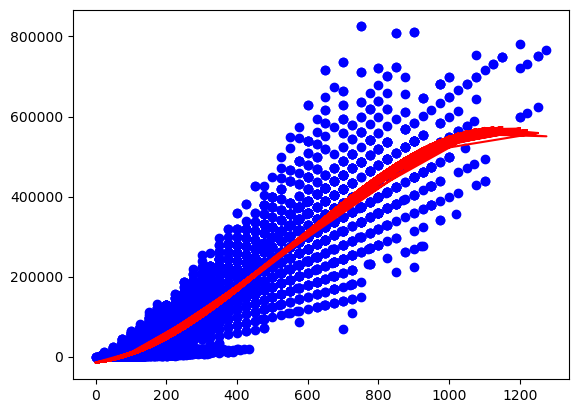

In [19]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

# Veri hazırlama
X = df[['Units Sold']].values
y = df['Total Sales'].values

# Polinom regresyon (overfitting için yüksek derece kullanılır)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Tahmin yapma
y_pred = model.predict(X_poly)

# Sonuçları görselleştirme
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.show()

## 5. K-Fold Cross Validation
K-Fold çapraz doğrulama kullanarak modelin performansını test edeceğiz.

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Karar ağacı regresyon modeli
model = DecisionTreeRegressor()

# K-Fold çapraz doğrulama
scores = cross_val_score(model, X, y, cv=5)

# Sonuçları yazdırma
print('Doğrulama skorları:', scores)


Doğrulama skorları: [  0.66000326   0.73295113   0.59701372  -9.57958624 -44.20339013]


## 6. Model Başarı Değerlendirme Metrikleri
Model performansını değerlendirmek için Precision, Recall, F1 Score gibi sınıflandırma metriklerini kullanacağız.

### Classification Metrikleri
- Accuracy (Doğruluk):
  - Doğru sınıflandırılan örneklerin tüm örneklere oranı.
  - Yalnızca dengeli veri setleri için uygundur, çünkü veri dengesiz olduğunda yanıltıcı olabilir. (Örneğin, %95 negatif ve %5 pozitif örnek içeren bir veri setinde tüm tahminler negatif olsa bile yüksek doğruluk alınabilir).
- Precision (Kesinlik):
  - Pozitif tahminlerin ne kadarının gerçekten pozitif olduğunu gösterir. Önemli olduğu durumlar: Yanlış pozitifler kritik olduğunda (örneğin spam filtreleri).
- Recall (Duyarlılık):
  - Gerçek pozitiflerin ne kadarının doğru tespit edildiğini gösterir. Önemli olduğu durumlar: Yanlış negatifler önemliyse (örneğin hastalık teşhisi).
- F1 Score:
  - Precision ve Recall'un harmonik ortalamasıdır. Dengesiz veri setlerinde iyi bir performans değerlendirmesi sağlar.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

accuracy_score = accuracy_score(y_test, dt_y_pred)
precision = precision_score(y_test, dt_y_pred, average="weighted")
recall = recall_score(y_test, dt_y_pred, average="weighted")
f1 = f1_score(y_test, dt_y_pred, average="weighted")

print(f'Accuracy: {accuracy_score}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6378238341968911
Precision: 0.6374319778614167
Recall: 0.6378238341968911
F1 Score: 0.6349540634750492


- **Accuracy (Doğruluk):**
  - **Anlamı:** Modelin doğru tahminlerinin, toplam tahminlere oranıdır.
  - **Min değeri:** 0
  - **Max değeri:** 1 (veya %100)
  - **Artma/Azalmalar:** Yüksek doğruluk modeli daha iyi yapar, ancak dengesiz veri setlerinde yanıltıcı olabilir (örneğin, negatif sınıfların çok olduğu veri setlerinde yüksek doğruluk düşük performans anlamına gelebilir).

- **Precision (Kesinlik):**
  - **Anlamı:** Pozitif olarak tahmin edilen değerlerin gerçekten pozitif olma oranıdır.
  - **Min değeri:** 0
  - **Max değeri:** 1
  - **Artma/Azalmalar:** Yüksek precision, yanlış pozitiflerin az olduğunu gösterir. Precision düşükse model pozitif sınıfları sık sık yanlış tahmin ediyordur.

- **Recall (Duyarlılık):**
  - **Anlamı:** Gerçek pozitiflerin ne kadarının doğru tahmin edildiğini gösterir.
  - **Min değeri:** 0
  - **Max değeri:** 1
  - **Artma/Azalmalar:** Yüksek recall, pozitif örneklerin çoğunun yakalandığını gösterir. Düşük recall, modelin pozitif sınıfları kaçırdığını gösterir.

- **F1 Score:**
  - **Anlamı:** Precision ve recall'un harmonik ortalamasıdır. Dengesiz veri setlerinde daha iyi bir performans değerlendirmesi sağlar.
  - **Min değeri:** 0
  - **Max değeri:** 1
  - **Artma/Azalmalar:** Yüksek F1 Score, hem yüksek precision hem de yüksek recall olduğunu gösterir. İkisinden biri düşükse, F1 Score da düşük olacaktır.


### Regresyon Metrikleri
Regresyon modelleri için MAE, MSE ve R2 skorlarını hesaplayacağız.

- Mean Squared Error (MSE):
  - Tahmin edilen değerlerin gerçek değerlerden ortalama kare hatası. Daha büyük hatalar daha fazla cezalandırılır. Bu yüzden modeldeki büyük sapmaları vurgular.
-Root Mean Squared Error (RMSE):
  - MSE’nin karekökü alınarak hesaplanır. Sonuçların birimi, hedef değişkenle aynıdır, bu nedenle yorumlamak daha kolaydır.
- Mean Absolute Error (MAE):
  - Tahmin edilen değerlerin gerçek değerlerden ortalama mutlak farkı. Outlier'lara MSE kadar duyarlı değildir, bu yüzden veride aşırı sapmalar varsa kullanılabilir.
- R² (Determinasyon Katsayısı):
  - Modelin hedef değişkenin varyansını ne kadar açıkladığını gösterir. Değeri 0 ile 1 arasında değişir ve 1'e ne kadar yakınsa modelin performansı o kadar iyidir.

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# MAE, MSE ve R2 skorlarını hesaplama
mae = mean_absolute_error(lr_y_test, lr_y_pred)
mse = mean_squared_error(lr_y_test, lr_y_pred)
r2 = r2_score(lr_y_test, lr_y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

MAE: 9.324026611810204, MSE: 158.89037113994, R2: 0.27497721315820245


- **Mean Squared Error (MSE):**
  - **Anlamı:** Tahmin edilen değerlerin gerçek değerlerden ortalama kare hatasıdır. Hata ne kadar büyükse MSE o kadar artar.
  - **Min değeri:** 0
  - **Max değeri:** Teorik olarak üst limit yoktur (hataların büyüklüğüne bağlı olarak artabilir).
  - **Artma/Azalmalar:** Yüksek MSE modelin tahminlerinde büyük hatalar yaptığını gösterir. Düşük MSE ise modelin tahminlerinin gerçeğe yakın olduğunu gösterir.

- **Mean Absolute Error (MAE):**
  - **Anlamı:** Tahmin edilen değerlerin gerçek değerlerden ortalama mutlak farkıdır.
  - **Min değeri:** 0
  - **Max değeri:** Teorik bir üst limit yoktur.
  - **Artma/Azalmalar:** MAE'nin artması modelin hatalarının büyüdüğünü gösterir. Düşük MAE, tahminlerin gerçek değerlere yakın olduğunu belirtir.

- **R² (Determinasyon Katsayısı):**
  - **Anlamı:** Modelin hedef değişkenin varyansını ne kadar açıkladığını gösterir.
  - **Min değeri:** Negatif değerler alabilir (modelin çok kötü olduğunu gösterir), 0 ise modelin rastgele tahmin yaptığını gösterir.
  - **Max değeri:** 1 (mükemmel uyum).
  - **Artma/Azalmalar:** R²'nin 1'e yakın olması, modelin hedef değişkenin varyansını iyi açıkladığını gösterir. Negatif veya sıfıra yakın değerler ise modelin kötü performans gösterdiğini işaret eder.